In [1]:
# library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read csv data
cwd = os.getcwd()
data_path = os.path.join(os.path.dirname(cwd),"data/").replace('/','\\') # for windows

application_train = pd.read_csv(os.path.join(data_path,"application_train.csv"))
application_test = pd.read_csv(os.path.join(data_path,"application_test.csv"))

print("Raw Train data:",len(application_train))
print("Raw Test data:",len(application_test))

Raw Train data: 307511
Raw Test data: 48744


In [61]:
application_train[["AMT_GOODS_PRICE"]].head()

,AMT_GOODS_PRICE
0,351000.0
1,1129500.0
2,135000.0
3,297000.0
4,513000.0


In [4]:
# try get rid of NULL ?
print("Raw Train data (remove NaN):",len(application_train.dropna()))
print("Raw Test data (remove NaN):",len(application_test.dropna()))

## Too many NaN values...

Raw Train data (remove NaN): 8602
Raw Test data (remove NaN): 1739


In [5]:
# rank columns by number of NaN contains
print("Train data")
print(application_train.isnull().astype(int).sum().sort_values(ascending=False))
print("\nTest data")
print(application_test.isnull().astype(int).sum().sort_values(ascending=False))

## Many columns contain NaN values more than 50%

Train data
COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
N

In [3]:
# Get rid of columns that contains NaN values more than 5% , and clear other NaN rows
application_train_fix = application_train.loc[:,application_train.isnull().astype(int).sum()<len(application_train)*0.05].dropna()
application_test_fix = application_test.loc[:,application_train.isnull().astype(int).sum()<len(application_train)*0.05].dropna()

In [7]:
print("Train data:",len(application_train_fix))
print("Test data:",len(application_test_fix))

Train data: 304531
Test data: 47772


In [8]:
# Look at features and dtypes
print(application_train_fix.columns)
print(application_train_fix.dtypes)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [4]:
# Convert to categorical (dummy)
application_train_fix["TARGET"] = application_train_fix["TARGET"].astype('category')
object_to_categorical = [col for col in application_train_fix.columns[application_train_fix.dtypes == object]]
#for col in object_to_categorical:
#    application_train_fix = pd.concat([application_train_fix,pd.get_dummies(application_train_fix[col])])
#    application_test_fix = pd.concat([application_test_fix,pd.get_dummies(application_test_fix[col])])


#dummy = pd.get_dummies(data = titanic_df_main["Sex"],drop_first=True)
#titanic_df_main = titanic_df_main.combine_first(dummy)

application_train_fix = application_train_fix.drop(object_to_categorical,axis=1)
application_test_fix = application_test_fix.drop(object_to_categorical,axis=1)

In [32]:
# create dataset
X = application_train_fix.drop(["SK_ID_CURR","TARGET"],axis=1) #SK_ID_CURR = id
Y = application_train_fix["TARGET"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Random Forest
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

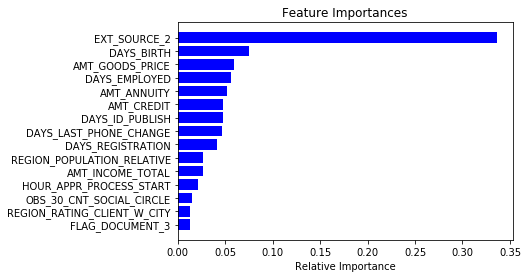

In [34]:
# Features impotance
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
# accuracy by model
print(clf.score(X_test,Y_test))

0.9181210698277702


In [40]:
# accuracy by guessing all negative
print(len(list(filter(lambda x: x==0, Y_test)))/len(Y_test))

0.9181046513537032


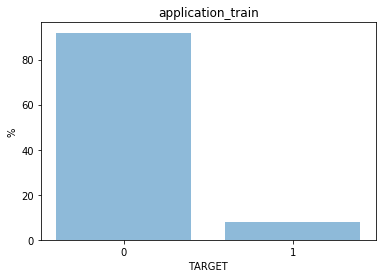

In [49]:

a=len(list(filter(lambda x: x==0, Y)))/len(Y)
b=len(list(filter(lambda x: x==1, Y)))/len(Y)



objects = ('0', '1')
y_pos = np.arange(len(objects))
performance = [a*100,b*100]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.xlabel('TARGET')
plt.title('application_train')
 
plt.show()

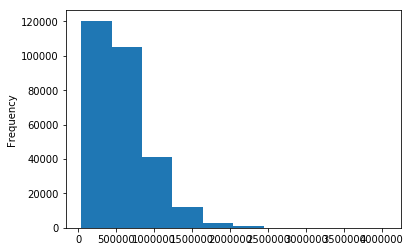

In [76]:

yes=application_train.loc[application_train['TARGET'] == 1]
no=application_train.loc[application_train['TARGET'] == 0]
no["AMT_GOODS_PRICE"]
no["AMT_GOODS_PRICE"].plot(kind='hist')
plt.show()
#application_train[["AMT_GOODS_PRICE"]].head()

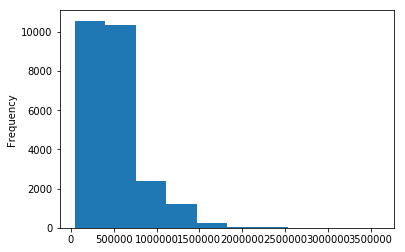

In [77]:
yes["AMT_GOODS_PRICE"]
yes["AMT_GOODS_PRICE"].plot(kind='hist')
plt.show()

In [100]:
no["DAYS_EMPLOYED"].head(20)
#no["DAYS_EMPLOYED"].plot(kind='hist')
#plt.show()

1      -1188
2       -225
3      -3039
4      -3038
5      -1588
6      -3130
7       -449
8     365243
9      -2019
10      -679
11    365243
12     -2717
13     -3028
14      -203
15     -1157
16     -1317
17      -191
18     -7804
19     -2038
20     -4286
Name: DAYS_EMPLOYED, dtype: int64

In [101]:
yes["DAYS_EMPLOYED"].head(20)
#yes["DAYS_EMPLOYED"].plot(kind='hist')
#plt.show()

0        -637
26      -2628
40      -1262
42      -3597
81     365243
94      -2015
110      -267
138      -200
154     -7676
163      -150
180     -1038
184      -111
211      -154
235     -9274
242      -146
246      -448
255      -602
260     -1572
261      -166
283    365243
Name: DAYS_EMPLOYED, dtype: int64

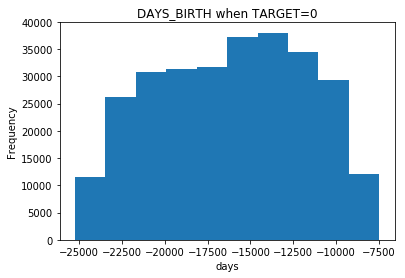

In [97]:
no["DAYS_BIRTH"].mean()
no["DAYS_BIRTH"].plot(kind='hist')
plt.xlabel("days")
plt.title("DAYS_BIRTH when TARGET=0")
plt.show()

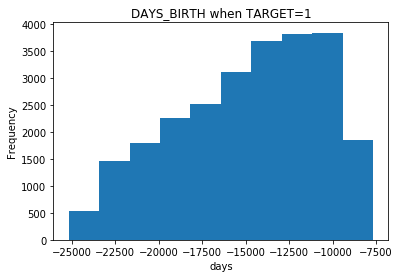

In [96]:
yes["DAYS_BIRTH"].mean()
yes["DAYS_BIRTH"].plot(kind='hist')
plt.title("DAYS_BIRTH when TARGET=1")
plt.xlabel("days")
plt.show()

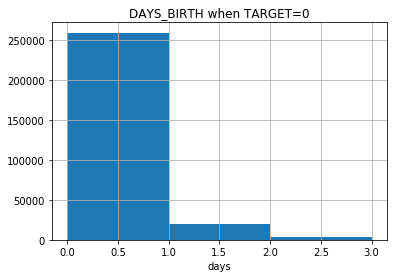

In [106]:

no["DEF_60_CNT_SOCIAL_CIRCLE"].mean()
no["DEF_60_CNT_SOCIAL_CIRCLE"].hist(bins=[0, 1,2,3]).figure
plt.xlabel("days")
plt.title("DAYS_BIRTH when TARGET=0")
plt.show()

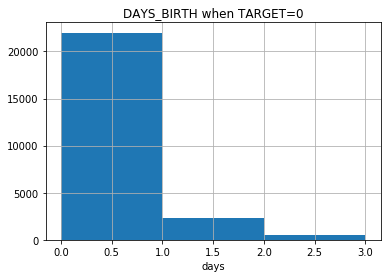

In [107]:

yes["DEF_60_CNT_SOCIAL_CIRCLE"].mean()
yes["DEF_60_CNT_SOCIAL_CIRCLE"].hist(bins=[0, 1,2,3]).figure
plt.xlabel("days")
plt.title("DAYS_BIRTH when TARGET=0")
plt.show()

In [43]:
len(list(filter(lambda x: x==1, Y_test)))/len(Y_test)

0.08189534864629681

### Weigthed Random Forest

In [23]:
# Random Forest
w=10
clf = RandomForestClassifier(max_depth=10, random_state=42,class_weight={0: 1, 1: w})
clf.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [36]:
from sklearn.metrics import confusion_matrix


In [34]:
y_pred = clf.predict(X_test)

In [98]:
tn, fn, fp, tp = confusion_matrix(Y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)
print("Predict","Positive","Negative")
print("Positive",tp,fp )
print("Negative",fn,tn)

print(tp+fp+fn+tn)
# accuracy by model
print(clf.score(X_test,Y_test))

0.14756952193902603 0.6627906976744186 0.24139315833667993
Predict Positive Negative
Positive 3306 1682
Negative 19097 36822
60907


ValueError: Number of features of the model must match the input. Model n_features is 51 and input n_features is 52 

In [82]:
print(len(list(filter(lambda x: x==1, Y_test))))
print(len(Y_test))

4988
60907


In [98]:
print(len(list(filter(lambda x: x==0, Y_train))))

223945


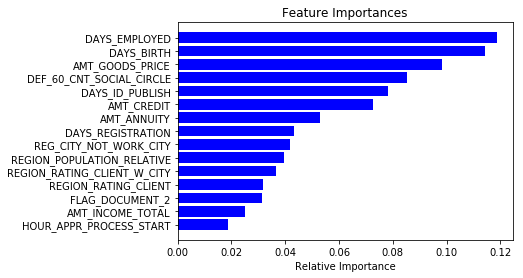

In [60]:
# Features impotance
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

## Upsample


In [5]:
from sklearn.utils import resample

In [50]:
# Separate majority and minority classes
df_majority = application_train_fix[application_train_fix.TARGET==0]
df_minority = application_train_fix[application_train_fix.TARGET==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=223945,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0
10,100014,0,1,112500.000,652500.0,21177.0,652500.0,0.022800,-10197,-679,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# create dataset
X_upsampled = df_upsampled.drop(["SK_ID_CURR","TARGET","EXT_SOURCE_2"],axis=1) #SK_ID_CURR = id
Y_upsampled = df_upsampled["TARGET"]

X_train_upsampled, X_test_upsampled, Y_train_upsampled, Y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=42)

In [53]:
# Random Forest
w=10
clf = RandomForestClassifier(max_depth=10, random_state=42,class_weight="balanced")
clf.fit(X_train_upsampled,Y_train_upsampled)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [57]:
y_pred = clf.predict(X_test.drop(["EXT_SOURCE_2"],axis=1))

In [59]:
tn, fn, fp, tp = confusion_matrix(Y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)
print("Predict","Positive","Negative")
print("Positive",tp,fp )
print("Negative",fn,tn)

print(tp+fp+fn+tn)
# accuracy by model
print(clf.score(X_test.drop(["EXT_SOURCE_2"],axis=1),Y_test))

0.14756952193902603 0.6627906976744186 0.24139315833667993
Predict Positive Negative
Positive 3306 1682
Negative 19097 36822
60907
0.658840527361387


In [31]:
# Features impotance
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'X_train' is not defined

In [25]:
df_test=application_test.loc[:,application_train.isnull().astype(int).sum()<len(application_train)*0.05]
df_test=df_test.drop(["SK_ID_CURR"],axis=1)
# Convert to categorical (dummy)

object_to_categorical = [col for col in df_test.columns[df_test.dtypes == object]]
#for col in object_to_categorical:
#    application_train_fix = pd.concat([application_train_fix,pd.get_dummies(application_train_fix[col])])
#    application_test_fix = pd.concat([application_test_fix,pd.get_dummies(application_test_fix[col])])


#dummy = pd.get_dummies(data = titanic_df_main["Sex"],drop_first=True)
#titanic_df_main = titanic_df_main.combine_first(dummy)

df_test = df_test.drop(object_to_categorical,axis=1)
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
df_test=df_test.fillna(method = 'bfill', axis=0).fillna(0)
test_predict=clf.predict(df_test)


In [11]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(original_data)

NameError: name 'original_data' is not defined

In [18]:
print(test_predict)

[0 0 0 ... 0 0 1]


In [26]:
ans=application_test[["SK_ID_CURR"]]

In [27]:
ans["TARGET"]=test_predict

C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
len(ans)

48744

In [29]:
ans.to_csv(os.path.join(data_path,"my_submission6.csv") ,index = False)

## Hyper parameter

In [11]:
random_grid={'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,  4],
 'min_samples_split': [2, 10],
 'n_estimators': [ 400, 800, 1000, 1600, 2000]}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_upsampled,Y_upsampled )

Fitting 3 folds for each of 10 candidates, totalling 30 fits


JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Jeed\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Jeed\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000020CE1F4B030, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Jeed\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\J...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000020CE1F4B030, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Jeed\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\J...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 15, 1, 23, 55, 241962, tzinfo=datetime.timezone.utc), 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'session': '85D5CA291BA64674815937468C8B4E6D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'85D5CA291BA64674815937468C8B4E6D']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 15, 1, 23, 55, 241962, tzinfo=datetime.timezone.utc), 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'session': '85D5CA291BA64674815937468C8B4E6D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'85D5CA291BA64674815937468C8B4E6D'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 15, 1, 23, 55, 241962, tzinfo=datetime.timezone.utc), 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'session': '85D5CA291BA64674815937468C8B4E6D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8EE77FCEFA4F4CBBB790405E40090727', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-16-045a8f431bf1>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 20c80a94358, executio..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000020C8061AED0, file "<ipython-input-16-045a8f431bf1>", line 10>
        result = <ExecutionResult object at 20c80a94358, executio..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000020C8061AED0, file "<ipython-input-16-045a8f431bf1>", line 10>, result=<ExecutionResult object at 20c80a94358, executio..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000020C8061AED0, file "<ipython-input-16-045a8f431bf1>", line 10>
        self.user_global_ns = {'In': ['', '# library\nimport os\nimport numpy as np\nimport pa... sklearn.cross_validation import train_test_split', '# read csv data\ncwd = os.getcwd()\ndata_path = os...n))\nprint("Raw Test data:",len(application_test))', '# Get rid of columns that contains NaN values mo...(int).sum()<len(application_train)*0.05].dropna()', '# Get rid of columns that contains NaN values mo...(int).sum()<len(application_train)*0.05].dropna()', "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', 'from sklearn.utils import resample', '# Separate majority and minority classes\ndf_majo...mpled])\n \n# Display new class counts\ndf_upsampled', '# create dataset\nX_upsampled = df_upsampled.drop...led, Y_upsampled, test_size=0.2, random_state=42)', "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', '# Convert to categorical (dummy)\napplication_tra...ation_test_fix.drop(object_to_categorical,axis=1)', '# Separate majority and minority classes\ndf_majo...mpled])\n \n# Display new class counts\ndf_upsampled', '# create dataset\nX_upsampled = df_upsampled.drop...led, Y_upsampled, test_size=0.2, random_state=42)', 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )'], 'Out': {9:         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CO...0                 0  

[503809 rows x 65 columns], 14:         SK_ID_CURR TARGET  CNT_CHILDREN  AMT_INC...0                 0  

[503809 rows x 54 columns]}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'X_test_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[100762 rows x 52 columns], 'X_train_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[403047 rows x 52 columns], 'X_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[503809 rows x 52 columns], 'Y_test_upsampled': 226990    0
213700    1
10196     1
240656    1
...62, dtype: category
Categories (2, int64): [0, 1], 'Y_train_upsampled': 5914      1
146211    1
37402     0
52518     0
...47, dtype: category
Categories (2, int64): [0, 1], ...}
        self.user_ns = {'In': ['', '# library\nimport os\nimport numpy as np\nimport pa... sklearn.cross_validation import train_test_split', '# read csv data\ncwd = os.getcwd()\ndata_path = os...n))\nprint("Raw Test data:",len(application_test))', '# Get rid of columns that contains NaN values mo...(int).sum()<len(application_train)*0.05].dropna()', '# Get rid of columns that contains NaN values mo...(int).sum()<len(application_train)*0.05].dropna()', "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', 'from sklearn.utils import resample', '# Separate majority and minority classes\ndf_majo...mpled])\n \n# Display new class counts\ndf_upsampled', '# create dataset\nX_upsampled = df_upsampled.drop...led, Y_upsampled, test_size=0.2, random_state=42)', "random_grid={'bootstrap': [True, False],\n 'max_d...,\n 'n_estimators': [ 400, 800, 1000, 1600, 2000]}", 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )', '# Convert to categorical (dummy)\napplication_tra...ation_test_fix.drop(object_to_categorical,axis=1)', '# Separate majority and minority classes\ndf_majo...mpled])\n \n# Display new class counts\ndf_upsampled', '# create dataset\nX_upsampled = df_upsampled.drop...led, Y_upsampled, test_size=0.2, random_state=42)', 'from sklearn.ensemble import RandomForestRegress...rch model\nrf_random.fit(X_upsampled,Y_upsampled )'], 'Out': {9:         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CO...0                 0  

[503809 rows x 65 columns], 14:         SK_ID_CURR TARGET  CNT_CHILDREN  AMT_INC...0                 0  

[503809 rows x 54 columns]}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'X_test_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[100762 rows x 52 columns], 'X_train_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[403047 rows x 52 columns], 'X_upsampled':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[503809 rows x 52 columns], 'Y_test_upsampled': 226990    0
213700    1
10196     1
240656    1
...62, dtype: category
Categories (2, int64): [0, 1], 'Y_train_upsampled': 5914      1
146211    1
37402     0
52518     0
...47, dtype: category
Categories (2, int64): [0, 1], ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Jeed\Documents\GCI\finalproject\script\<ipython-input-16-045a8f431bf1> in <module>()
      5 rf = RandomForestRegressor()
      6 # Random search of parameters, using 3 fold cross validation, 
      7 # search across 100 different combinations, and use all available cores
      8 rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
      9 # Fit the random search model
---> 10 rf_random.fit(X_upsampled,Y_upsampled )

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=3, error_score='raise',
  ...turn_train_score='warn', scoring=None, verbose=2), X=        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[503809 rows x 52 columns], y=1         0
2         0
3         0
4         0
...09, dtype: category
Categories (2, int64): [0, 1], groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X =         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CRED...0                 0  

[503809 rows x 52 columns]
        y = 1         0
2         0
3         0
4         0
...09, dtype: category
Categories (2, int64): [0, 1]
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Sun Jul 15 11:09:48 2018
PID: 259808                Python 3.6.1: C:\Users\Jeed\Anaconda3\python.exe
...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),         CNT_CHILDREN  AMT_INCOME_TOTAL        .....  0                 0

[503809 rows x 52 columns], 1         0
2         0
3         0
4         0
...09, dtype: category
Categories (2, int64): [0, 1], {'score': <function _passthrough_scorer>}, memmap([167937, 167938, 167939, ..., 503806, 503807, 503808]), array([     0,      1,      2, ..., 167934, 167935, 167936]), 2, {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1600}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),         CNT_CHILDREN  AMT_INCOME_TOTAL        .....  0                 0

[503809 rows x 52 columns], 1         0
2         0
3         0
4         0
...09, dtype: category
Categories (2, int64): [0, 1], {'score': <function _passthrough_scorer>}, memmap([167937, 167938, 167939, ..., 503806, 503807, 503808]), array([     0,      1,      2, ..., 167934, 167935, 167936]), 2, {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1600})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=        CNT_CHILDREN  AMT_INCOME_TOTAL        .....  0                 0

[503809 rows x 52 columns], y=1         0
2         0
3         0
4         0
...09, dtype: category
Categories (2, int64): [0, 1], scorer={'score': <function _passthrough_scorer>}, train=memmap([167937, 167938, 167939, ..., 503806, 503807, 503808]), test=array([     0,      1,      2, ..., 167934, 167935, 167936]), verbose=2, parameters={'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1600}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestRegr... random_state=None, verbose=0, warm_start=False)>
        X_train =         CNT_CHILDREN  AMT_INCOME_TOTAL        .....  0                 0

[335872 rows x 52 columns]
        y_train = 184623    0
184624    0
184626    0
184627    0
...72, dtype: category
Categories (2, int64): [0, 1]
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 1599
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object BaseForest.fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object BaseForest.fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=869919207, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), None, 469, 1600), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=869919207, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), None, 469, 1600)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=869919207, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), sample_weight=None, tree_idx=469, n_trees=1600, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...=False, random_state=869919207, splitter='best')>
        X = array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])
        sample_weight = None
        curr_sample_weight = array([1., 2., 1., ..., 1., 1., 1.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=869919207, splitter='best'), X=array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), sample_weight=array([1., 2., 1., ..., 1., 1., 1.]), check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...t=False, random_state=869919207, splitter='best'), X=array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]]), sample_weight=array([1., 2., 1., ..., 1., 1., 1.]), check_input=False, X_idx_sorted=None)
    357                                            max_depth,
    358                                            max_leaf_nodes,
    359                                            self.min_impurity_decrease,
    360                                            min_impurity_split)
    361 
--> 362         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[      0.,  202500.,  292500., ...,      ...   0.,       0.,       0.]],
      dtype=float32)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])
        sample_weight = array([1., 2., 1., ..., 1., 1., 1.])
        X_idx_sorted = None
    363 
    364         if self.n_outputs_ == 1:
    365             self.n_classes_ = self.n_classes_[0]
    366             self.classes_ = self.classes_[0]

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._add_node()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._resize_c()

...........................................................................
C:\Users\Jeed\Anaconda3\lib\site-packages\sklearn\tree\_utils.cp36-win_amd64.pyd in sklearn.tree._utils.safe_realloc()

MemoryError: could not allocate 1835008 bytes
___________________________________________________________________________

## Data

In [22]:
# create dataset
X = application_train_fix[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]] #SK_ID_CURR = id
Y = application_train_fix["TARGET"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
application_train_fix.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FL

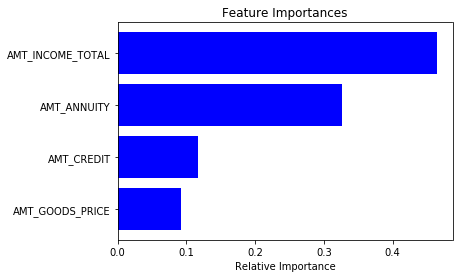

In [24]:
# 小数第３まで表示
%precision 3

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# Features impotance by ExtraTrees
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
# accuracy by model
print(model.score(X_test,Y_test))

0.9002413515687852


In [28]:
sample_submission = pd.read_csv(os.path.join(data_path,"sample_submission.csv"))
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
5,100042,0.5
6,100057,0.5
7,100065,0.5
8,100066,0.5
9,100067,0.5


In [31]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
object_to_categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [108]:
19097/36822*100

51.86301667481396